In [1]:
from __future__ import print_function
import torch

In [19]:
import sys
print(sys.version)
print(torch.__version__)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
1.0.1


## Tensors
Tensors are similar to NumPy's ndarrays, with the addition being that Tensors canalso be used on a GPU to accelerate computing.

In [3]:
# Construct 5x3 matrix, unitialized
x = torch.empty(5,3)
print(x)

tensor([[ 0.0000e+00,  8.5899e+09,  0.0000e+00],
        [ 8.5899e+09,  3.6434e-44,  0.0000e+00],
        [ 1.2757e-30,  0.0000e+00, -7.7384e+23],
        [ 4.5755e-41,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  7.0065e-45]])


In [4]:
# Construct a randomly initialized matrix
x = torch.rand(5,3)
print(x)

tensor([[0.0707, 0.1585, 0.9385],
        [0.2181, 0.5402, 0.7016],
        [0.8760, 0.4098, 0.5432],
        [0.2294, 0.5457, 0.0197],
        [0.5658, 0.9815, 0.1583]])


In [5]:
# Construct a matrix filled zeros and of dype long
x = torch.zeros(5,3,dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [6]:
x = torch.tensor([5.5,3])
print(x)

tensor([5.5000, 3.0000])


In [7]:
x = x.new_ones(5,3,dtype=torch.double)
print(x)

x = torch.rand_like(x, dtype=torch.float) # override dtype
                                          # result has the same size
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[0.4902, 0.6233, 0.4469],
        [0.5859, 0.0603, 0.8070],
        [0.1850, 0.2655, 0.1542],
        [0.6545, 0.6436, 0.1836],
        [0.8829, 0.3339, 0.1944]])


In [8]:
print(x.size())

torch.Size([5, 3])


## Operations

In [9]:
y = torch.rand(5,3)
print(x+y)
print(torch.add(x,y))

tensor([[0.7267, 1.5144, 0.5928],
        [1.5856, 0.1185, 1.1273],
        [0.3429, 0.9957, 0.6141],
        [1.4339, 1.4582, 0.4323],
        [1.3163, 0.5069, 0.8610]])
tensor([[0.7267, 1.5144, 0.5928],
        [1.5856, 0.1185, 1.1273],
        [0.3429, 0.9957, 0.6141],
        [1.4339, 1.4582, 0.4323],
        [1.3163, 0.5069, 0.8610]])


In [10]:
result = torch.empty(5,3)
torch.add(x,y,out=result)
print(result)

tensor([[0.7267, 1.5144, 0.5928],
        [1.5856, 0.1185, 1.1273],
        [0.3429, 0.9957, 0.6141],
        [1.4339, 1.4582, 0.4323],
        [1.3163, 0.5069, 0.8610]])


In [11]:
# Adds x to y
y.add_(x)
print(y)

tensor([[0.7267, 1.5144, 0.5928],
        [1.5856, 0.1185, 1.1273],
        [0.3429, 0.9957, 0.6141],
        [1.4339, 1.4582, 0.4323],
        [1.3163, 0.5069, 0.8610]])


In [12]:
print(x[:,1])

tensor([0.6233, 0.0603, 0.2655, 0.6436, 0.3339])


In [13]:
# Resizing tensor
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1,8)
print(x.size(), y.size(),z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## NumPy Bridge

In [14]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


a.add_(1)
print(a)
print(b) # b follows the change of a 

In [15]:
# Converting Numpy array to torch tensor
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [16]:
# CUDA Tensors
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x+y
    print(z)
    print(z.to("cpu",torch.double))

## AUTOGRAD: Automatic Differentiation

x = torch.ones(2, 2, requires_grad=True)
print(x)

In [22]:
y = x+2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [23]:
print(y.grad_fn)

In [24]:
z = y*y*3
out = z.mean()
print(z,out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)


In [28]:
a = torch.randn(2,2)
a = ((a*3)/(a-1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

False
True


## Gradient

In [ ]:
out.backward()

In [32]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [33]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-785.6834, -339.9073,  999.8305], grad_fn=<MulBackward0>)


In [34]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [35]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


## Neuarl Networks

In [36]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [38]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


In [39]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0923,  0.0014, -0.2023,  0.0040, -0.0194,  0.0343,  0.0828, -0.0212,
         -0.0115,  0.0148]], grad_fn=<AddmmBackward>)


## Loss Function

In [40]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.2226, grad_fn=<MseLossBackward>)


In [41]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## Backprop

In [43]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0179, -0.0075, -0.0083,  0.0105, -0.0116, -0.0113])


## Update the Weights
The simplest update rule used in practice is the Stochastic Gradient Descent (SGD):

weight = weight - learning_rate * gradient

In [44]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [45]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

## Training an Image Classifier

In [46]:
import torchvision
import torchvision.transforms as transforms

In [49]:
# Loading and normalizing CIFAR 10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


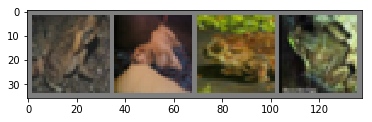

 frog   dog  frog  frog


In [50]:
# Show images
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [52]:
# Define a CNN
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [53]:
# Define a loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [55]:
# Train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.212
[1,  4000] loss: 1.962
[1,  6000] loss: 1.723
[1,  8000] loss: 1.640
[1, 10000] loss: 1.557
[1, 12000] loss: 1.496
[2,  2000] loss: 1.421
[2,  4000] loss: 1.403
[2,  6000] loss: 1.383
[2,  8000] loss: 1.352
[2, 10000] loss: 1.303
[2, 12000] loss: 1.324
Finished Training


In [56]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [57]:
net = Net()
net.load_state_dict(torch.load(PATH))

In [58]:
outputs = net(images)

In [59]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog   cat  frog  frog


In [60]:
# Calculate accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [63]:
# Calculate accuracy by each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 73 %
Accuracy of  bird : 33 %
Accuracy of   cat : 59 %
Accuracy of  deer : 32 %
Accuracy of   dog : 36 %
Accuracy of  frog : 59 %
Accuracy of horse : 60 %
Accuracy of  ship : 49 %
Accuracy of truck : 59 %


In [64]:
# Train on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
